<a href="https://colab.research.google.com/github/zainab9271/AI-Dojo_Machine_learning_bootcamp/blob/main/Assignment_07_Sequence_Modeling_Zainab_Mahmood.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 07: Sequence Modeling

This Week's assignment is to train sequence models on the `Emoji Data` to classify the sentences emotion. You'll be creating models that takes in a sentence and predicts the appropriate emoji that describes the sentiment.

Before starting copy this file and work on your own copy by following the below steps: <br>
`File > Save Copy in Drive`. Then add your name to the file (e.g., Assignment 07: Sequence Modeling - Zahraa Dhafer).

**DATASET**
The dataset consists of two csv files, a training file with 16k rows and a testing file with 2k rows, each row has 3 columns, the sentence, the emotion as text (meant to provide description to the emoji and not to be used in training/testing) and the emoji symbol (e.g. 😄, 😡, 😍).<br><br>
**Submission Deadline: Thursday, 3/3/2022 at 3:00 PM**

**Requirements:**
1. Set TensorFlow's random seed to 42.
2. Import all necessary libraries for the sequence modeling project.
3. Download the dataset (the link is provided below).
4. Read data from CSV files and split it into inputs and targets (no need to do train_test_split as the data is already split).
**Note**: Read both Train and Test files
5. Tokenize and pad the text, use a vocabulary size of 10,000 and maximum sequence length of 64.
6. Do the appropriate operations on the targets to prepare them for training.
7. Define the sequential models, make sure to use RNN,LSTM,GRU and DNN with Embedding layers using Bidirectional LSTM if necessary. The training and validation accuracy should be at least 94% and 88% respectively.
8. Use Adam optimizer and the appropriate loss function and metrics to compile the model.
9. Use ModelCheckpoint callback to save the models at the epoch with the best validation accuracy, each model file should have your name (e.g. for Zahraa Dhafer, the model's file name would be "LSTM_Zahraa_D.h5). Make sure to download the model file as it will be a part of your assignment submission. <br>[ModelCheckpoint documentation](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint)
10. Plot the models metrics.




**HINTS:**
Set the new hyperparameters like vocabulary size, input length (i.e. max sequence length) in a separate cell after the import cell in your notebook (failing to do so will affect your style score)

**Note:** To get the best performance from the model, manually tune the hyperparameters of each model. 

Find relevant links below:<br>

[Assignment Colab File](https://colab.research.google.com/drive/129V6jlMgzfOWi033t7xIgdn0ZKRvnjP-?usp=sharing)<br>
[Dataset](https://drive.google.com/drive/folders/1i7LmIH7sJHSARAMXgznBqXZ82tzMhYiL?usp=sharing)

[Submission Form](https://docs.google.com/forms/d/e/1FAIpQLSff0OH5akQLPw7LArOYwXwVvJVHtQSgKGnfxlpI8OL-NBUrcg/viewform?usp=pp_url)<br>


Good luck and feel free to ask any questions in the or on the Questions channel.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1- Import all necessary libraries for the sequence modeling project

In [ ]:
# write your code below

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sn
from sklearn import metrics
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
tf.random.set_seed(42)

# 2- Download the dataset

In [ ]:
# write your code below

!gdown --id "1v3xPVj9d9DmuusXFWFUtKiMPtIX6ffLt"
!gdown --id "1peqmLNHwf5NUgBl_qibVixNHxxwQ69jk"

Downloading...
From: https://drive.google.com/uc?id=1v3xPVj9d9DmuusXFWFUtKiMPtIX6ffLt
To: /content/test.csv
100% 217k/217k [00:00<00:00, 80.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1peqmLNHwf5NUgBl_qibVixNHxxwQ69jk
To: /content/train.csv
100% 1.74M/1.74M [00:00<00:00, 146MB/s]


# 3- Read data from CSV files and split it into inputs and targets 

**Note**: no need to do train_test_split as the data is already split

In [ ]:
# write your code below

train_df = pd.read_csv('/content/train.csv')
train_df.drop(['emotion'], axis=1, inplace=True)
train_df

,text,emoji
0,i didnt feel humiliated,😢
1,i can go from feeling so hopeless to so damned...,😢
2,im grabbing a minute to post i feel greedy wrong,😡
3,i am ever feeling nostalgic about the fireplac...,😍
4,i am feeling grouchy,😡
...,...,...
15995,i just had a very brief time in the beanbag an...,😢
15996,i am now turning and i feel pathetic that i am...,😢
15997,i feel strong and good overall,😄
15998,i feel like this was such a rude comment and i...,😡


In [ ]:
train_input = train_df.text
train_output = train_df.emoji
print(train_input)
print(train_output)

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: text, Length: 16000, dtype: object
0        😢
1        😢
2        😡
3        😍
4        😡
        ..
15995    😢
15996    😢
15997    😄
15998    😡
15999    😢
Name: emoji, Length: 16000, dtype: object


In [ ]:
test_df = pd.read_csv('/content/test.csv')
test_df.drop(['emotion'], axis=1, inplace=True)
test_df

,text,emoji
0,im feeling rather rotten so im not very ambiti...,😢
1,im updating my blog because i feel shitty,😢
2,i never make her separate from me because i do...,😢
3,i left with my bouquet of red and yellow tulip...,😄
4,i was feeling a little vain when i did this one,😢
...,...,...
1995,i just keep feeling like someone is being unki...,😡
1996,im feeling a little cranky negative after this...,😡
1997,i feel that i am useful to my people and that ...,😄
1998,im feeling more comfortable with derby i feel ...,😄


In [ ]:
test_input = test_df.text
test_output = test_df.emoji
print(test_input)
print(test_output)

0       im feeling rather rotten so im not very ambiti...
1               im updating my blog because i feel shitty
2       i never make her separate from me because i do...
3       i left with my bouquet of red and yellow tulip...
4         i was feeling a little vain when i did this one
                              ...                        
1995    i just keep feeling like someone is being unki...
1996    im feeling a little cranky negative after this...
1997    i feel that i am useful to my people and that ...
1998    im feeling more comfortable with derby i feel ...
1999    i feel all weird when i have to meet w people ...
Name: text, Length: 2000, dtype: object
0       😢
1       😢
2       😢
3       😄
4       😢
       ..
1995    😡
1996    😡
1997    😄
1998    😄
1999    😨
Name: emoji, Length: 2000, dtype: object


#4- Tokenize and pad the text, use a vocabulary size of 10,000 and maximum sequence length of 64

In [ ]:
vocab_size = 10000
max_sequence = 64
embedding_dim = 100

In [ ]:
train_input[0]

'i didnt feel humiliated'

In [ ]:
test_input[0]

'im feeling rather rotten so im not very ambitious right now'

In [ ]:
# write your code below

def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('-',' ',text)
    text = re.sub('"',' ',text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = " ".join(filter(lambda x:x[0]!="@", text.split()))
    return text

train_input = train_input.apply(clean_text)
test_input = test_input.apply(clean_text)

In [ ]:
train_input[0]

'i didnt feel humiliated'

In [ ]:
test_input[100]

'i feel needy but comfortable with it i feel vulnerable but secure i feel the urge to cum hard but i get no relief'

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stopwords_list = stopwords.words('english')
for index, word in enumerate(stopwords_list):
    stopwords_list[index] = re.sub("'", '', word)
stopwords_list.append('im')
print(sorted(stopwords_list))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', 'arent', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', 'couldnt', 'd', 'did', 'didn', 'didnt', 'do', 'does', 'doesn', 'doesnt', 'doing', 'don', 'dont', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', 'hadnt', 'has', 'hasn', 'hasnt', 'have', 'haven', 'havent', 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'im', 'in', 'into', 'is', 'isn', 'isnt', 'it', 'its', 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', 'mightnt', 'more', 'most', 'mustn', 'mustnt', 'my', 'myself', 'needn', 'neednt', 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', 'shant', 'she', 'shes', 'should', 'shouldn', 'shouldnt', 'shouldve', 'so', 'some', 'such', 't

In [ ]:
def remove_stopwords(text):
    text = text.split()
    text = [word for word in text if not word in stopwords_list]
    text = ' '.join(text)
    return text

In [ ]:
train_input = train_input.apply(remove_stopwords)
test_input = test_input.apply(remove_stopwords)

In [ ]:
train_input[0]

'feel humiliated'

In [ ]:
test_input[0]

'feeling rather rotten ambitious right'

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(
    num_words=vocab_size,
    oov_token='<OOV>'
)

tokenizer.fit_on_texts(train_input)

In [ ]:
train_input_tokenized = tokenizer.texts_to_sequences(train_input)
test_input_tokenized = tokenizer.texts_to_sequences(test_input)

In [ ]:
train_input_tokenized[0]

[2, 553]

In [ ]:
test_input_tokenized[0]

[3, 98, 589, 5431, 36]

In [ ]:
for token in test_input_tokenized[0]:
    print(tokenizer.index_word[token], end=' ')

feeling rather rotten ambitious right 

In [ ]:
train_padded = tf.keras.preprocessing.sequence.pad_sequences(
    train_input_tokenized,
    maxlen=max_sequence,
    padding='post', 
    truncating='post'
)

test_padded = tf.keras.preprocessing.sequence.pad_sequences(
    test_input_tokenized,
    maxlen=max_sequence, 
    padding='post', 
    truncating='post'
)

In [ ]:
train_padded[0]

array([  2, 553,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
      dtype=int32)

In [ ]:
test_padded[0]

array([   3,   98,  589, 5431,   36,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

#5- Do the appropriate operations on the targets to prepare them for training

In [ ]:
# write your code below
emoji_word = {'😍': 'love', '😄': 'joy', '😢': 'sadness', '😲': 'surprise', '😨': 'fear', '😡': 'anger'}
emojies = set(train_output)
emojies_id = list(range(len(emojies)))
print(emojies)
print(emojies_id)
emoji_index = dict(zip(emojies, emojies_id))
print(emoji_index)
index_emoji = dict(zip(emojies_id, emojies))
print(index_emoji)

{'😨', '😲', '😍', '😄', '😡', '😢'}
[0, 1, 2, 3, 4, 5]
{'😨': 0, '😲': 1, '😍': 2, '😄': 3, '😡': 4, '😢': 5}
{0: '😨', 1: '😲', 2: '😍', 3: '😄', 4: '😡', 5: '😢'}


In [ ]:
train_output = train_output.map(emoji_index)
train_output[0]

5

In [ ]:
test_output = test_output.map(emoji_index)
test_output[3]

3

#6- Modeling:
Define the sequential models, make sure to use RNN,LSTM,GRU and DNN with Embedding layers using Bidirectional LSTM if necessary. The training and validation accuracy should be at least 94% and 88% respectively

## Utility Functions

In [ ]:
func_round = lambda x: round(x,4)

def model_details(model, model_name):
    evaluation_list = model.evaluate(test_padded, test_output)
    metrics_labels = ['val_loss', 'val_acc']
    model_dict = dict(zip(metrics_labels, map(func_round, evaluation_list)))
    model_dict['model'] = model_name
    return model_dict

def model_scores(pred, color):
    print(f'accuracy_score: {metrics.accuracy_score(test_output, pred)}')
    print(f"precision_score: {metrics.precision_score(test_output, pred, average='micro')}")
    print(f"recall_score: {metrics.recall_score(test_output, pred, average='micro')}")
    print(f"f1_score: {metrics.f1_score(test_output, pred, average='micro')}")
    plt.figure(figsize=(10,10))
    plt.rcParams['font.size'] = '12'
    labels = [emoji_word[index_emoji[i]] for i in range(len(index_emoji.keys()))]
    sn.heatmap(metrics.confusion_matrix(test_output, pred), cmap=color, annot=True, linewidths=2, yticklabels=labels, xticklabels=labels)

list_model_details = []

## Data Pipeline

In [ ]:
def create_dataset(x, y):
    data = tf.data.Dataset.from_tensor_slices((x, y))
    data = data.shuffle(1024)
    data = data.batch(64)
    data = data.prefetch(tf.data.AUTOTUNE)
    return data

train_dataset = create_dataset(train_padded, train_output)
test_dataset = create_dataset(test_padded, test_output)

In [ ]:
for x, y in train_dataset.take(1):
    print(x[0])
    print(y[0])

tf.Tensor(
[   2  390 3357    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0], shape=(64,), dtype=int32)
tf.Tensor(0, shape=(), dtype=int64)


## Embedded DNN Model

In [ ]:
# write your code below
tf.keras.backend.clear_session()
dnn_model = tf.keras.Sequential(
    [
     tf.keras.layers.Input(shape=(max_sequence,)),
     tf.keras.layers.Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, mask_zero=True),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(units=64, activation='leaky_relu'),
     tf.keras.layers.Dropout(rate=0.2),
     tf.keras.layers.Dense(units=6, activation='softmax')
    ]
)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 100)           1000100   
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 64)                409664    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 1,410,154
Trainable params: 1,410,154
Non-trainable params: 0
_________________________________________________________________


In [ ]:

best_dnn_model = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/saved_models/EmbdDNN_Zainab_Mahmood.h5', 
                                                    monitor='val_acc', 
                                                    save_best_only=True )
dnn_model.compile(optimizer=tf.optimizers.Adam(), 
                  loss=tf.losses.SparseCategoricalCrossentropy(), 
                  metrics=['acc'])
dnn_model.fit(train_dataset, epochs=6, validation_data=test_dataset, callbacks=[best_dnn_model])

Epoch 1/6
250/250 [==============================] - 2s 8ms/step - loss: 1.2041 - acc: 0.5583 - val_loss: 0.5150 - val_acc: 0.8450
Epoch 2/6
250/250 [==============================] - 2s 8ms/step - loss: 0.2798 - acc: 0.9104 - val_loss: 0.3473 - val_acc: 0.8855
Epoch 3/6
250/250 [==============================] - 2s 6ms/step - loss: 0.0930 - acc: 0.9724 - val_loss: 0.3790 - val_acc: 0.8775
Epoch 4/6
250/250 [==============================] - 2s 6ms/step - loss: 0.0512 - acc: 0.9861 - val_loss: 0.3935 - val_acc: 0.8730
Epoch 5/6
250/250 [==============================] - 2s 6ms/step - loss: 0.0342 - acc: 0.9909 - val_loss: 0.4330 - val_acc: 0.8720
Epoch 6/6
250/250 [==============================] - 2s 6ms/step - loss: 0.0267 - acc: 0.9931 - val_loss: 0.4515 - val_acc: 0.8700


In [ ]:
best_dnn_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_models/EmbdDNN_Zainab_Mahmood.h5')
evaluation_dnn_model = model_details(model= best_dnn_model, model_name='DNN + Embedded')
evaluation_dnn_model

63/63 [==============================] - 1s 7ms/step - loss: 0.3473 - acc: 0.8855


{'model': 'DNN + Embedded', 'val_acc': 0.8855, 'val_loss': 0.3473}

In [ ]:
list_model_details.append(evaluation_dnn_model)
list_model_details

[{'model': 'DNN + Embedded', 'val_acc': 0.8855, 'val_loss': 0.3473}]

### Plot the model metrics

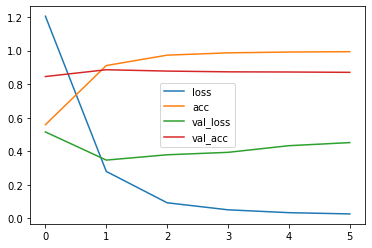

In [ ]:
pd.DataFrame(dnn_model.history.history).plot()

accuracy_score: 0.8855
precision_score: 0.8855
recall_score: 0.8855
f1_score: 0.8855


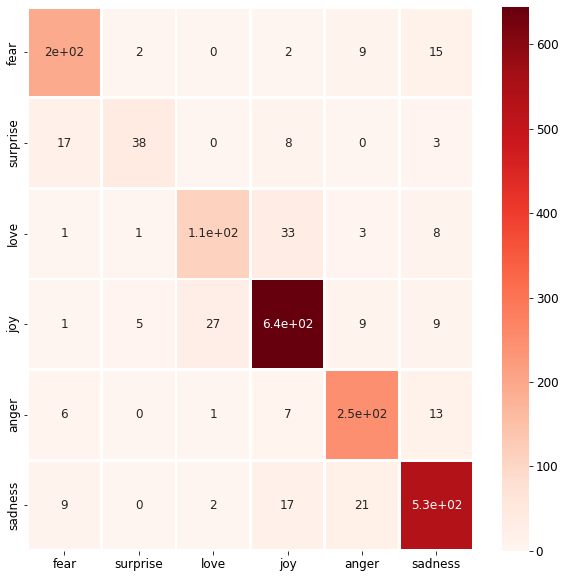

In [ ]:
pred = np.argmax(best_dnn_model.predict(test_padded), -1)
model_scores(pred, color='Reds')

## RNN + Embeding

### version 1

In [ ]:
tf.keras.backend.clear_session()
rnn_model = tf.keras.Sequential(
    [
     tf.keras.layers.Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, mask_zero=True, input_length=max_sequence),
     tf.keras.layers.SimpleRNN(128),
     tf.keras.layers.Dense(units=6, activation='softmax')
    ]
)
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 100)           1000100   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               29312     
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 1,030,186
Trainable params: 1,030,186
Non-trainable params: 0
_________________________________________________________________


In [ ]:
best_rnn_model = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/saved_models/EmbdRNN_Zainab_Mahmood.h5', 
                                                    monitor='val_acc', 
                                                    save_best_only=True )
rnn_model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
rnn_model.fit(train_dataset, epochs=6, validation_data=test_dataset, callbacks=[best_rnn_model])

Epoch 1/6
250/250 [==============================] - 50s 190ms/step - loss: 1.1896 - acc: 0.5492 - val_loss: 0.5910 - val_acc: 0.8155
Epoch 2/6
250/250 [==============================] - 47s 189ms/step - loss: 0.3201 - acc: 0.8951 - val_loss: 0.4175 - val_acc: 0.8580
Epoch 3/6
250/250 [==============================] - 38s 153ms/step - loss: 0.1249 - acc: 0.9627 - val_loss: 0.4514 - val_acc: 0.8535
Epoch 4/6
250/250 [==============================] - 38s 152ms/step - loss: 0.0704 - acc: 0.9791 - val_loss: 0.4850 - val_acc: 0.8475
Epoch 5/6
250/250 [==============================] - 43s 173ms/step - loss: 0.0454 - acc: 0.9879 - val_loss: 0.5530 - val_acc: 0.8445
Epoch 6/6
250/250 [==============================] - 42s 168ms/step - loss: 0.0378 - acc: 0.9898 - val_loss: 0.6007 - val_acc: 0.8445


In [ ]:
best_rnn_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_models/EmbdRNN_Zainab_Mahmood.h5')
evaluation_rnn_1_model = model_details(model= best_rnn_model, model_name='RNN1 + Embedded')
evaluation_rnn_1_model

63/63 [==============================] - 1s 12ms/step - loss: 0.4175 - acc: 0.8580


{'model': 'RNN1 + Embedded', 'val_acc': 0.858, 'val_loss': 0.4175}

In [ ]:
list_model_details.append(evaluation_rnn_1_model)
list_model_details

[{'model': 'DNN + Embedded', 'val_acc': 0.8855, 'val_loss': 0.3473},
 {'model': 'RNN1 + Embedded', 'val_acc': 0.858, 'val_loss': 0.4175}]

#### Plot the model metrics

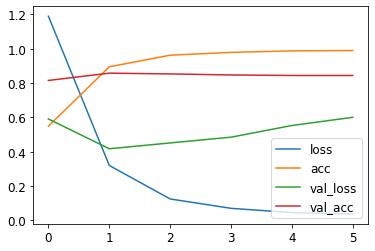

In [ ]:
pd.DataFrame(rnn_model.history.history).plot()

accuracy_score: 0.858
precision_score: 0.858
recall_score: 0.858
f1_score: 0.858


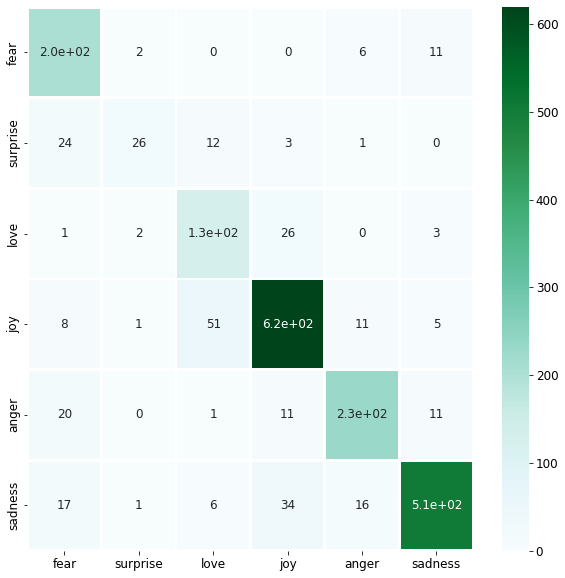

In [ ]:
pred = np.argmax(best_rnn_model.predict(test_padded), -1)
model_scores(pred, color='BuGn')

### version 2

In [ ]:
tf.keras.backend.clear_session()
rnn_2_model = tf.keras.Sequential(
    [
     tf.keras.layers.Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, mask_zero=True, input_length=max_sequence),
     tf.keras.layers.SimpleRNN(128, return_sequences=True),
     tf.keras.layers.SimpleRNN(128),
     tf.keras.layers.Dense(units=6, activation='softmax')
    ]
)
rnn_2_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 100)           1000100   
                                                                 
 simple_rnn (SimpleRNN)      (None, 64, 128)           29312     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 1,063,082
Trainable params: 1,063,082
Non-trainable params: 0
_________________________________________________________________


In [ ]:
best_rnn_2_model = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/saved_models/EmbdRNN2_Zainab_Mahmood.h5', 
                                                    monitor='val_acc', 
                                                    save_best_only=True )
rnn_2_model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
rnn_2_model.fit(train_dataset, epochs=6, validation_data=test_dataset, callbacks=[best_rnn_2_model])

Epoch 1/6
250/250 [==============================] - 74s 287ms/step - loss: 1.1190 - acc: 0.5736 - val_loss: 0.5756 - val_acc: 0.7915
Epoch 2/6
250/250 [==============================] - 75s 300ms/step - loss: 0.2841 - acc: 0.9035 - val_loss: 0.4323 - val_acc: 0.8555
Epoch 3/6
250/250 [==============================] - 63s 250ms/step - loss: 0.1120 - acc: 0.9649 - val_loss: 0.4613 - val_acc: 0.8665
Epoch 4/6
250/250 [==============================] - 63s 253ms/step - loss: 0.0602 - acc: 0.9809 - val_loss: 0.5503 - val_acc: 0.8480
Epoch 5/6
250/250 [==============================] - 61s 244ms/step - loss: 0.0433 - acc: 0.9872 - val_loss: 0.6002 - val_acc: 0.8455
Epoch 6/6
250/250 [==============================] - 83s 330ms/step - loss: 0.0330 - acc: 0.9905 - val_loss: 0.6675 - val_acc: 0.8440


In [ ]:
best_rnn_2_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_models/EmbdRNN2_Zainab_Mahmood.h5')
evaluation_rnn_2_model = model_details(model= best_rnn_2_model, model_name= 'RNN2 + Embedded')
evaluation_rnn_2_model

63/63 [==============================] - 2s 19ms/step - loss: 0.4613 - acc: 0.8665


{'model': 'RNN2 + Embedded', 'val_acc': 0.8665, 'val_loss': 0.4613}

In [ ]:
list_model_details.append(evaluation_rnn_2_model)
list_model_details

[{'model': 'DNN + Embedded', 'val_acc': 0.8855, 'val_loss': 0.3473},
 {'model': 'RNN1 + Embedded', 'val_acc': 0.858, 'val_loss': 0.4175},
 {'model': 'RNN2 + Embedded', 'val_acc': 0.8665, 'val_loss': 0.4613}]

#### Plot the model metrics

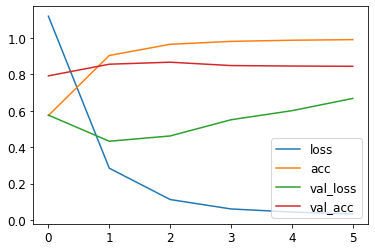

In [ ]:
pd.DataFrame(rnn_2_model.history.history).plot()

accuracy_score: 0.8665
precision_score: 0.8665
recall_score: 0.8665
f1_score: 0.8665000000000002


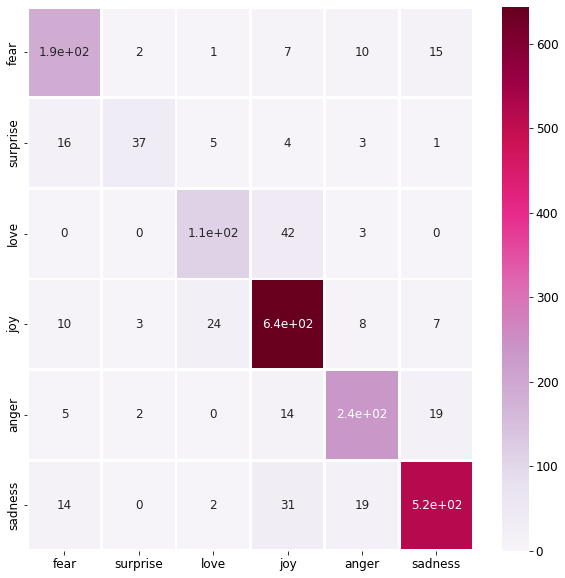

In [ ]:
pred = np.argmax(best_rnn_2_model.predict(test_padded), -1)
model_scores(pred, color='PuRd')

## LSTM + Embedding

### version 1

In [ ]:
tf.keras.backend.clear_session()
embd_lstm_model = tf.keras.Sequential(
    [
     tf.keras.layers.Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, mask_zero=True, input_length=max_sequence),
     tf.keras.layers.LSTM(units=128, return_sequences= False),
     tf.keras.layers.LayerNormalization(),
     tf.keras.layers.Dense(units=6, activation='softmax')
    ]
)
embd_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 100)           1000100   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 layer_normalization (LayerN  (None, 128)              256       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 1,118,378
Trainable params: 1,118,378
Non-trainable params: 0
_________________________________________________________________


In [ ]:
best_embd_lstm_model = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/saved_models/EmbdLSTM1_Zainab_Mahmood.h5', 
                                                    monitor='val_acc', 
                                                    save_best_only=True )
embd_lstm_model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
embd_lstm_model.fit(train_dataset, epochs=6, validation_data=test_dataset, callbacks=[best_embd_lstm_model])

Epoch 1/6
250/250 [==============================] - 13s 24ms/step - loss: 0.7305 - acc: 0.7452 - val_loss: 0.3639 - val_acc: 0.8735
Epoch 2/6
250/250 [==============================] - 5s 18ms/step - loss: 0.1439 - acc: 0.9499 - val_loss: 0.3720 - val_acc: 0.8800
Epoch 3/6
250/250 [==============================] - 5s 18ms/step - loss: 0.0718 - acc: 0.9752 - val_loss: 0.4092 - val_acc: 0.8755
Epoch 4/6
250/250 [==============================] - 5s 18ms/step - loss: 0.0560 - acc: 0.9820 - val_loss: 0.5242 - val_acc: 0.8605
Epoch 5/6
250/250 [==============================] - 5s 18ms/step - loss: 0.0477 - acc: 0.9831 - val_loss: 0.4808 - val_acc: 0.8730
Epoch 6/6
250/250 [==============================] - 5s 18ms/step - loss: 0.0353 - acc: 0.9870 - val_loss: 0.5216 - val_acc: 0.8730


In [ ]:
best_embd_lstm_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_models/EmbdLSTM1_Zainab_Mahmood.h5')
evaluation_embd_lstm_model = model_details(model= best_embd_lstm_model, model_name= 'LSTM1 + Embedded')
evaluation_embd_lstm_model

63/63 [==============================] - 2s 6ms/step - loss: 0.3720 - acc: 0.8800


{'model': 'LSTM1 + Embedded', 'val_acc': 0.88, 'val_loss': 0.372}

In [ ]:
list_model_details.append(evaluation_embd_lstm_model)
list_model_details

[{'model': 'DNN + Embedded', 'val_acc': 0.8855, 'val_loss': 0.3473},
 {'model': 'RNN1 + Embedded', 'val_acc': 0.858, 'val_loss': 0.4175},
 {'model': 'RNN2 + Embedded', 'val_acc': 0.8665, 'val_loss': 0.4613},
 {'model': 'LSTM1 + Embedded', 'val_acc': 0.88, 'val_loss': 0.372}]

#### Plot the model metrics

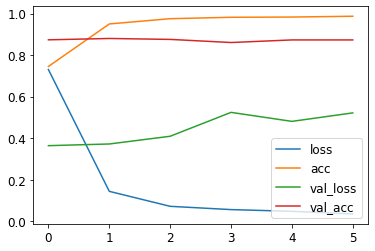

In [ ]:
pd.DataFrame(embd_lstm_model.history.history).plot()

accuracy_score: 0.88
precision_score: 0.88
recall_score: 0.88
f1_score: 0.88


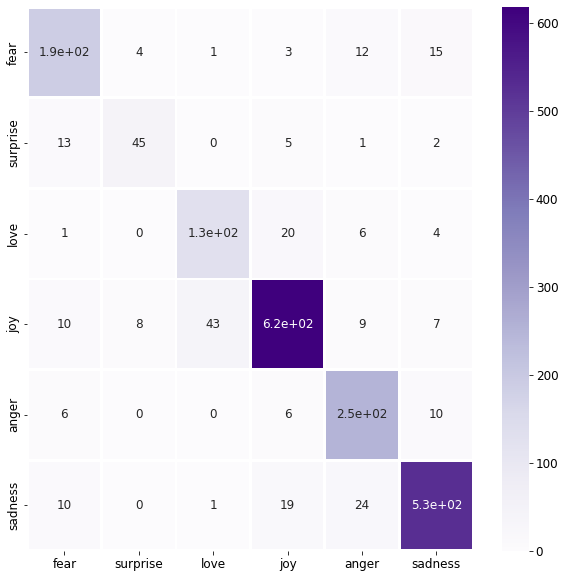

In [ ]:
pred = np.argmax(best_embd_lstm_model.predict(test_padded), -1)
model_scores(pred, color='Purples')

### version 2

In [ ]:
tf.keras.backend.clear_session()
embd_lstm_2_model = tf.keras.Sequential(
    [
     tf.keras.layers.Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, mask_zero=True, input_length=max_sequence),
     tf.keras.layers.LSTM(units=128, return_sequences= True, dropout=0.3, recurrent_dropout=0.3),
     tf.keras.layers.LayerNormalization(),
     tf.keras.layers.LSTM(units=128, return_sequences= False, dropout=0.3, recurrent_dropout=0.3),
     tf.keras.layers.LayerNormalization(),
     tf.keras.layers.Dense(units=6, activation='softmax')
    ]
)
embd_lstm_2_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 100)           1000100   
                                                                 
 lstm (LSTM)                 (None, 64, 128)           117248    
                                                                 
 layer_normalization (LayerN  (None, 64, 128)          256       
 ormalization)                                                   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 layer_normalization_1 (Laye  (None, 128)              256       
 rNormalization)                                                 
                                                                 
 dense (Dense)               (None, 6)                 7

In [ ]:
best_embd_lstm_2_model = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/saved_models/EmbdLSTM2_Zainab_Mahmood.h5', 
                                                    monitor='val_acc', 
                                                    save_best_only=True )
embd_lstm_2_model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
embd_lstm_2_model.fit(train_dataset, epochs=6, validation_data=test_dataset, callbacks=[best_embd_lstm_2_model])

Epoch 1/6
250/250 [==============================] - 235s 914ms/step - loss: 0.9182 - acc: 0.6610 - val_loss: 0.3591 - val_acc: 0.8645
Epoch 2/6
250/250 [==============================] - 251s 1s/step - loss: 0.2279 - acc: 0.9164 - val_loss: 0.3544 - val_acc: 0.8690
Epoch 3/6
250/250 [==============================] - 239s 955ms/step - loss: 0.1232 - acc: 0.9559 - val_loss: 0.3497 - val_acc: 0.8845
Epoch 4/6
250/250 [==============================] - 284s 1s/step - loss: 0.0865 - acc: 0.9683 - val_loss: 0.3764 - val_acc: 0.8870
Epoch 5/6
250/250 [==============================] - 265s 1s/step - loss: 0.0667 - acc: 0.9746 - val_loss: 0.3657 - val_acc: 0.8905
Epoch 6/6
250/250 [==============================] - 206s 822ms/step - loss: 0.0556 - acc: 0.9785 - val_loss: 0.3546 - val_acc: 0.8990


In [ ]:
best_embd_lstm_2_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_models/EmbdLSTM2_Zainab_Mahmood.h5')
evaluation_embd_lstm_2_model = model_details(model= best_embd_lstm_2_model, model_name= 'LSTM2 + Embedded')
evaluation_embd_lstm_2_model

63/63 [==============================] - 4s 58ms/step - loss: 0.3546 - acc: 0.8990


{'model': 'LSTM2 + Embedded', 'val_acc': 0.899, 'val_loss': 0.3546}

In [ ]:
list_model_details.append(evaluation_embd_lstm_2_model)
list_model_details

[{'model': 'DNN + Embedded', 'val_acc': 0.8855, 'val_loss': 0.3473},
 {'model': 'RNN1 + Embedded', 'val_acc': 0.858, 'val_loss': 0.4175},
 {'model': 'RNN2 + Embedded', 'val_acc': 0.8665, 'val_loss': 0.4613},
 {'model': 'LSTM1 + Embedded', 'val_acc': 0.88, 'val_loss': 0.372},
 {'model': 'LSTM2 + Embedded', 'val_acc': 0.899, 'val_loss': 0.3546}]

#### Plot the model metrics

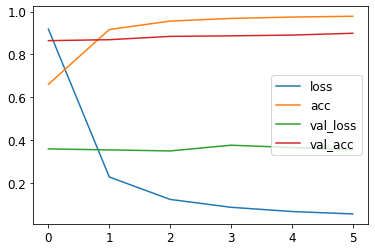

In [ ]:
pd.DataFrame(embd_lstm_2_model.history.history).plot()

accuracy_score: 0.899
precision_score: 0.899
recall_score: 0.899
f1_score: 0.899


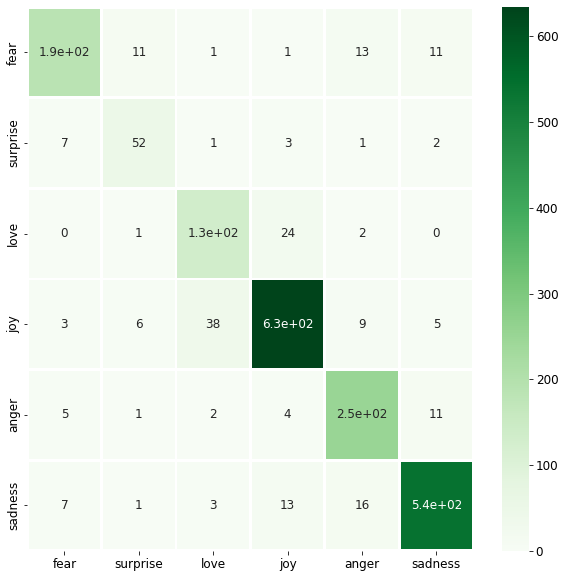

In [ ]:
pred = np.argmax(best_embd_lstm_2_model.predict(test_padded), -1)
model_scores(pred, color='Greens')

## Bidirectional LSTM + Embedding

### version 1

In [ ]:
tf.keras.backend.clear_session()
bidrct_embd_lstm_model = tf.keras.Sequential(
    [
     tf.keras.layers.Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, mask_zero=True, input_length=max_sequence),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, return_sequences= False)),
     tf.keras.layers.LayerNormalization(),
     tf.keras.layers.Dense(units=6, activation='softmax')
    ]
)
bidrct_embd_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 100)           1000100   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              234496    
 l)                                                              
                                                                 
 layer_normalization (LayerN  (None, 256)              512       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 6)                 1542      
                                                                 
Total params: 1,236,650
Trainable params: 1,236,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
best_bidrct_embd_lstm_model = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/saved_models/BidirEmbdLSTM1_Zainab_Mahmood.h5', 
                                                    monitor='val_acc', 
                                                    save_best_only=True )
bidrct_embd_lstm_model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
bidrct_embd_lstm_model.fit(train_dataset, epochs=6, validation_data=test_dataset, callbacks=[best_bidrct_embd_lstm_model])

Epoch 1/6
250/250 [==============================] - 23s 56ms/step - loss: 0.6950 - acc: 0.7499 - val_loss: 0.3953 - val_acc: 0.8610
Epoch 2/6
250/250 [==============================] - 8s 31ms/step - loss: 0.1403 - acc: 0.9519 - val_loss: 0.4813 - val_acc: 0.8540
Epoch 3/6
250/250 [==============================] - 9s 34ms/step - loss: 0.0703 - acc: 0.9773 - val_loss: 0.4577 - val_acc: 0.8635
Epoch 4/6
250/250 [==============================] - 8s 31ms/step - loss: 0.0500 - acc: 0.9850 - val_loss: 0.5206 - val_acc: 0.8620
Epoch 5/6
250/250 [==============================] - 8s 34ms/step - loss: 0.0403 - acc: 0.9869 - val_loss: 0.5860 - val_acc: 0.8650
Epoch 6/6
250/250 [==============================] - 8s 31ms/step - loss: 0.0409 - acc: 0.9872 - val_loss: 0.5632 - val_acc: 0.8610


In [ ]:
best_bidrct_embd_lstm_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_models/BidirEmbdLSTM1_Zainab_Mahmood.h5')
evaluation_bidrct_embd_lstm_model = model_details(model= best_bidrct_embd_lstm_model, model_name= 'BidirLSTM1 + Embedded')
evaluation_bidrct_embd_lstm_model

63/63 [==============================] - 3s 9ms/step - loss: 0.5860 - acc: 0.8650


{'model': 'BidirLSTM1 + Embedded', 'val_acc': 0.865, 'val_loss': 0.586}

In [ ]:
list_model_details.append(evaluation_bidrct_embd_lstm_model)
list_model_details

[{'model': 'DNN + Embedded', 'val_acc': 0.8855, 'val_loss': 0.3473},
 {'model': 'RNN1 + Embedded', 'val_acc': 0.858, 'val_loss': 0.4175},
 {'model': 'RNN2 + Embedded', 'val_acc': 0.8665, 'val_loss': 0.4613},
 {'model': 'LSTM1 + Embedded', 'val_acc': 0.88, 'val_loss': 0.372},
 {'model': 'LSTM2 + Embedded', 'val_acc': 0.899, 'val_loss': 0.3546},
 {'model': 'BidirLSTM1 + Embedded', 'val_acc': 0.865, 'val_loss': 0.586}]

#### Plot the model metrics

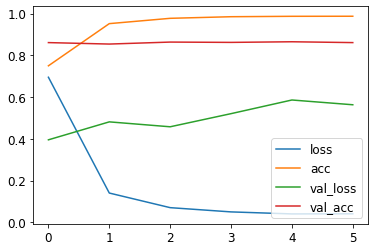

In [ ]:
pd.DataFrame(bidrct_embd_lstm_model.history.history).plot()

accuracy_score: 0.865
precision_score: 0.865
recall_score: 0.865
f1_score: 0.865


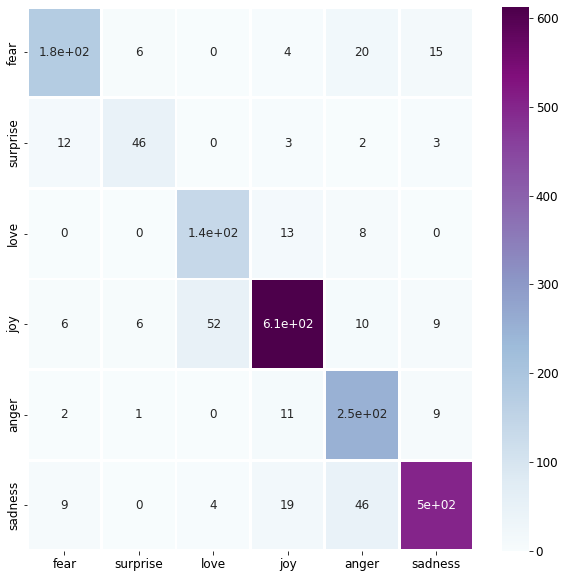

In [ ]:
pred = np.argmax(best_bidrct_embd_lstm_model.predict(test_padded), -1)
model_scores(pred, color='BuPu')

### version 2

In [ ]:
tf.keras.backend.clear_session()
bidrct_embd_lstm_2_model = tf.keras.Sequential(
    [
     tf.keras.layers.Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, mask_zero=True, input_length=max_sequence),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, return_sequences= True)),
     tf.keras.layers.LayerNormalization(),
     tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=128, return_sequences= False)),
     tf.keras.layers.LayerNormalization(),
     tf.keras.layers.Dense(units=6, activation='softmax')
    ]
)
bidrct_embd_lstm_2_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 100)           1000100   
                                                                 
 bidirectional (Bidirectiona  (None, 64, 256)          234496    
 l)                                                              
                                                                 
 layer_normalization (LayerN  (None, 64, 256)          512       
 ormalization)                                                   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 layer_normalization_1 (Laye  (None, 256)              512       
 rNormalization)                                        

In [ ]:
best_bidrct_embd_lstm_2_model = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/saved_models/BidirEmbdLSTM2_Zainab_Mahmood.h5', 
                                                    monitor='val_acc', 
                                                    save_best_only=True )
bidrct_embd_lstm_2_model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
bidrct_embd_lstm_2_model.fit(train_dataset, epochs=6, validation_data=test_dataset, callbacks=[best_bidrct_embd_lstm_2_model])

Epoch 1/6
250/250 [==============================] - 38s 86ms/step - loss: 0.7557 - acc: 0.7268 - val_loss: 0.3570 - val_acc: 0.8720
Epoch 2/6
250/250 [==============================] - 16s 64ms/step - loss: 0.1353 - acc: 0.9489 - val_loss: 0.3794 - val_acc: 0.8835
Epoch 3/6
250/250 [==============================] - 15s 61ms/step - loss: 0.0578 - acc: 0.9782 - val_loss: 0.4035 - val_acc: 0.8740
Epoch 4/6
250/250 [==============================] - 16s 64ms/step - loss: 0.0426 - acc: 0.9852 - val_loss: 0.3758 - val_acc: 0.8910
Epoch 5/6
250/250 [==============================] - 16s 64ms/step - loss: 0.0279 - acc: 0.9893 - val_loss: 0.4090 - val_acc: 0.8935
Epoch 6/6
250/250 [==============================] - 15s 61ms/step - loss: 0.0253 - acc: 0.9909 - val_loss: 0.4666 - val_acc: 0.8890


In [ ]:
best_bidrct_embd_lstm_2_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_models/BidirEmbdLSTM2_Zainab_Mahmood.h5')
evaluation_bidrct_embd_lstm_2_model = model_details(model= best_bidrct_embd_lstm_2_model, model_name= 'BidirLSTM2 + Embedded')
evaluation_bidrct_embd_lstm_2_model

63/63 [==============================] - 7s 17ms/step - loss: 0.4090 - acc: 0.8935


{'model': 'BidirLSTM2 + Embedded', 'val_acc': 0.8935, 'val_loss': 0.409}

In [ ]:
list_model_details.append(evaluation_bidrct_embd_lstm_2_model)
list_model_details

[{'model': 'DNN + Embedded', 'val_acc': 0.8855, 'val_loss': 0.3473},
 {'model': 'RNN1 + Embedded', 'val_acc': 0.858, 'val_loss': 0.4175},
 {'model': 'RNN2 + Embedded', 'val_acc': 0.8665, 'val_loss': 0.4613},
 {'model': 'LSTM1 + Embedded', 'val_acc': 0.88, 'val_loss': 0.372},
 {'model': 'LSTM2 + Embedded', 'val_acc': 0.899, 'val_loss': 0.3546},
 {'model': 'BidirLSTM1 + Embedded', 'val_acc': 0.865, 'val_loss': 0.586},
 {'model': 'BidirLSTM2 + Embedded', 'val_acc': 0.8935, 'val_loss': 0.409}]

#### Plot the model metrics

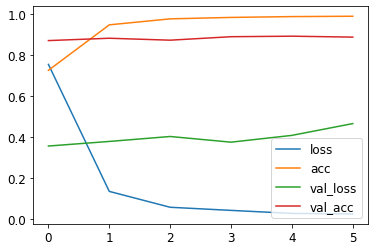

In [ ]:
pd.DataFrame(bidrct_embd_lstm_2_model.history.history).plot()

accuracy_score: 0.8935
precision_score: 0.8935
recall_score: 0.8935
f1_score: 0.8935


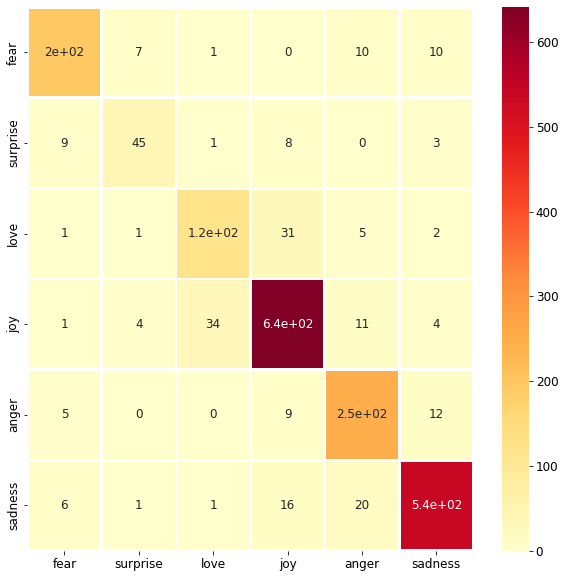

In [ ]:
pred = np.argmax(best_bidrct_embd_lstm_2_model.predict(test_padded), -1)
model_scores(pred, color='YlOrRd')

## GRU + Embedding

### version 1

In [ ]:
tf.keras.backend.clear_session()
embd_gru_model = tf.keras.Sequential(
    [
     tf.keras.layers.Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, mask_zero=True, input_length=max_sequence),
     tf.keras.layers.GRU(units=128, return_sequences= False),
     tf.keras.layers.LayerNormalization(),
     tf.keras.layers.Dense(units=6, activation='softmax')
    ]
)
embd_gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 100)           1000100   
                                                                 
 gru (GRU)                   (None, 128)               88320     
                                                                 
 layer_normalization (LayerN  (None, 128)              256       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 6)                 774       
                                                                 
Total params: 1,089,450
Trainable params: 1,089,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
best_embd_gru_model = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/saved_models/EmbdGRU1_Zainab_Mahmood.h5', 
                                                    monitor='val_acc', 
                                                    save_best_only=True )
embd_gru_model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
embd_gru_model.fit(train_dataset, epochs=6, validation_data=test_dataset, callbacks=[best_embd_gru_model])

Epoch 1/6
250/250 [==============================] - 10s 23ms/step - loss: 0.8300 - acc: 0.7056 - val_loss: 0.3865 - val_acc: 0.8670
Epoch 2/6
250/250 [==============================] - 4s 17ms/step - loss: 0.1562 - acc: 0.9436 - val_loss: 0.3428 - val_acc: 0.8850
Epoch 3/6
250/250 [==============================] - 4s 17ms/step - loss: 0.0630 - acc: 0.9779 - val_loss: 0.3611 - val_acc: 0.8955
Epoch 4/6
250/250 [==============================] - 4s 17ms/step - loss: 0.0390 - acc: 0.9864 - val_loss: 0.3891 - val_acc: 0.8865
Epoch 5/6
250/250 [==============================] - 4s 17ms/step - loss: 0.0293 - acc: 0.9889 - val_loss: 0.4392 - val_acc: 0.8910
Epoch 6/6
250/250 [==============================] - 4s 17ms/step - loss: 0.0244 - acc: 0.9909 - val_loss: 0.4617 - val_acc: 0.8895


In [ ]:
best_embd_gru_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_models/EmbdGRU1_Zainab_Mahmood.h5')
evaluation_embd_gru_model = model_details(model= best_embd_gru_model, model_name= 'GRU1 + Embedded')
evaluation_embd_gru_model

63/63 [==============================] - 3s 5ms/step - loss: 0.3611 - acc: 0.8955


{'model': 'GRU1 + Embedded', 'val_acc': 0.8955, 'val_loss': 0.3611}

In [ ]:
list_model_details.append(evaluation_embd_gru_model)

#### Plot the model metrics

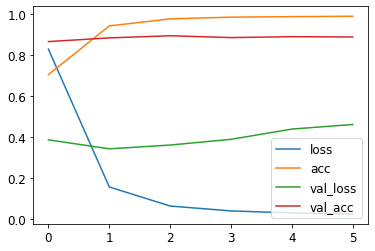

In [ ]:
pd.DataFrame(embd_gru_model.history.history).plot()

accuracy_score: 0.8955
precision_score: 0.8955
recall_score: 0.8955
f1_score: 0.8955


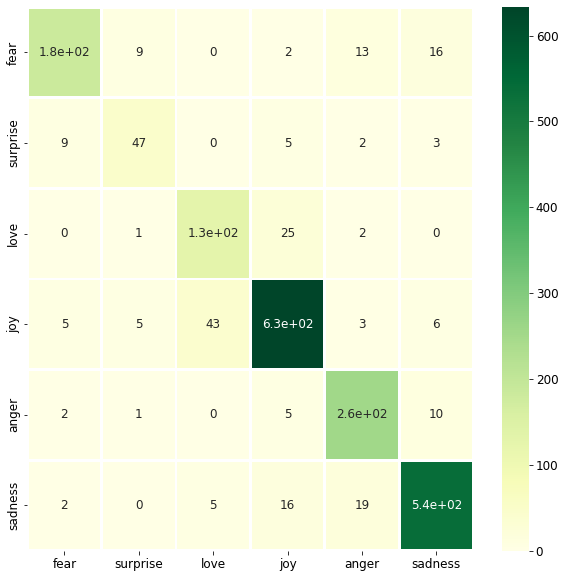

In [ ]:
pred = np.argmax(best_embd_gru_model.predict(test_padded), -1)
model_scores(pred, color='YlGn')

### version 2

In [ ]:
tf.keras.backend.clear_session()
embd_gru_2_model = tf.keras.Sequential(
    [
     tf.keras.layers.Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, mask_zero=True, input_length=max_sequence),
     tf.keras.layers.GRU(units=128, return_sequences= True),
     tf.keras.layers.LayerNormalization(),
     tf.keras.layers.GRU(units=128, return_sequences= False),
     tf.keras.layers.LayerNormalization(),
     tf.keras.layers.Dense(units=6, activation='softmax')
    ]
)
embd_gru_2_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 100)           1000100   
                                                                 
 gru (GRU)                   (None, 64, 128)           88320     
                                                                 
 layer_normalization (LayerN  (None, 64, 128)          256       
 ormalization)                                                   
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 layer_normalization_1 (Laye  (None, 128)              256       
 rNormalization)                                                 
                                                                 
 dense (Dense)               (None, 6)                 7

In [ ]:
best_embd_gru_2_model = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/saved_models/EmbdGRU2_Zainab_Mahmood.h5', 
                                                    monitor='val_acc', 
                                                    save_best_only=True )
embd_gru_2_model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
embd_gru_2_model.fit(train_dataset, epochs=6, validation_data=test_dataset, callbacks=[best_embd_gru_2_model])

Epoch 1/6
250/250 [==============================] - 19s 41ms/step - loss: 0.7577 - acc: 0.7250 - val_loss: 0.2489 - val_acc: 0.9005
Epoch 2/6
250/250 [==============================] - 7s 30ms/step - loss: 0.1106 - acc: 0.9551 - val_loss: 0.2373 - val_acc: 0.9085
Epoch 3/6
250/250 [==============================] - 7s 30ms/step - loss: 0.0493 - acc: 0.9819 - val_loss: 0.2616 - val_acc: 0.9140
Epoch 4/6
250/250 [==============================] - 7s 29ms/step - loss: 0.0323 - acc: 0.9880 - val_loss: 0.3163 - val_acc: 0.9060
Epoch 5/6
250/250 [==============================] - 7s 29ms/step - loss: 0.0234 - acc: 0.9918 - val_loss: 0.3310 - val_acc: 0.9035
Epoch 6/6
250/250 [==============================] - 7s 29ms/step - loss: 0.0222 - acc: 0.9923 - val_loss: 0.3498 - val_acc: 0.9005


In [ ]:
best_embd_gru_2_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_models/EmbdGRU2_Zainab_Mahmood.h5')
evaluation_embd_gru_2_model = model_details(model= best_embd_gru_2_model, model_name= 'GRU2 + Embedded')
evaluation_embd_gru_2_model

63/63 [==============================] - 6s 9ms/step - loss: 0.2616 - acc: 0.9140


{'model': 'GRU2 + Embedded', 'val_acc': 0.914, 'val_loss': 0.2616}

In [ ]:
list_model_details.append(evaluation_embd_gru_2_model)
list_model_details

[{'model': 'DNN + Embedded', 'val_acc': 0.8855, 'val_loss': 0.3473},
 {'model': 'RNN1 + Embedded', 'val_acc': 0.858, 'val_loss': 0.4175},
 {'model': 'RNN2 + Embedded', 'val_acc': 0.8665, 'val_loss': 0.4613},
 {'model': 'LSTM1 + Embedded', 'val_acc': 0.88, 'val_loss': 0.372},
 {'model': 'LSTM2 + Embedded', 'val_acc': 0.899, 'val_loss': 0.3546},
 {'model': 'BidirLSTM1 + Embedded', 'val_acc': 0.865, 'val_loss': 0.586},
 {'model': 'BidirLSTM2 + Embedded', 'val_acc': 0.8935, 'val_loss': 0.409},
 {'model': 'GRU1 + Embedded', 'val_acc': 0.8955, 'val_loss': 0.3611},
 {'model': 'GRU2 + Embedded', 'val_acc': 0.914, 'val_loss': 0.2616}]

#### Plot the model metrics

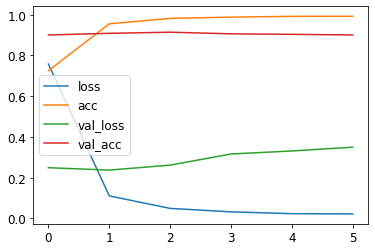

In [ ]:
pd.DataFrame(embd_gru_2_model.history.history).plot()

accuracy_score: 0.914
precision_score: 0.914
recall_score: 0.914
f1_score: 0.914


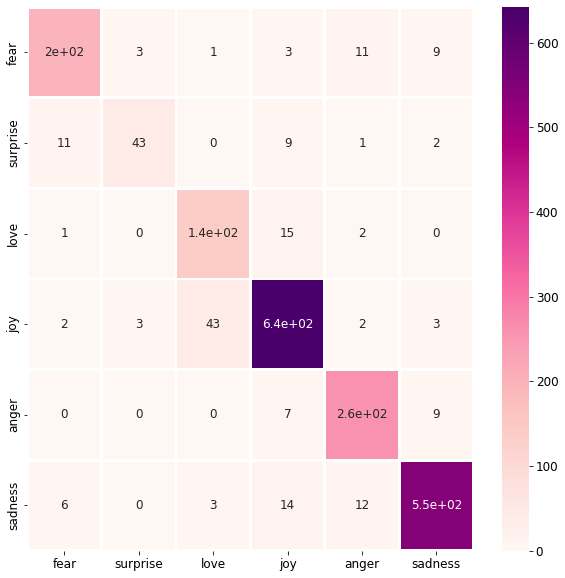

In [ ]:
pred = np.argmax(best_embd_gru_2_model.predict(test_padded), -1)
model_scores(pred, color='RdPu')

## Bidirectional GRU + Embedding

### version 1

In [ ]:
tf.keras.backend.clear_session()
bidrct_embd_gru_model = tf.keras.Sequential(
    [
     tf.keras.layers.Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, mask_zero=True, input_length=max_sequence),
     tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=128, return_sequences= False)),
     tf.keras.layers.LayerNormalization(),
     tf.keras.layers.Dense(units=6, activation='softmax')
    ]
)
bidrct_embd_gru_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 100)           1000100   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              176640    
 l)                                                              
                                                                 
 layer_normalization (LayerN  (None, 256)              512       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 6)                 1542      
                                                                 
Total params: 1,178,794
Trainable params: 1,178,794
Non-trainable params: 0
_________________________________________________________________


In [ ]:
best_bidrct_embd_gru_model = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/saved_models/BidirEmbdGRU1_Zainab_Mahmood.h5', 
                                                    monitor='val_acc', 
                                                    save_best_only=True )
bidrct_embd_gru_model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
bidrct_embd_gru_model.fit(train_dataset, epochs=6, validation_data=test_dataset, callbacks=[best_bidrct_embd_gru_model])

Epoch 1/6
250/250 [==============================] - 20s 47ms/step - loss: 0.7321 - acc: 0.7368 - val_loss: 0.3721 - val_acc: 0.8560
Epoch 2/6
250/250 [==============================] - 8s 31ms/step - loss: 0.1377 - acc: 0.9541 - val_loss: 0.3785 - val_acc: 0.8740
Epoch 3/6
250/250 [==============================] - 8s 31ms/step - loss: 0.0616 - acc: 0.9812 - val_loss: 0.4280 - val_acc: 0.8810
Epoch 4/6
250/250 [==============================] - 7s 28ms/step - loss: 0.0417 - acc: 0.9869 - val_loss: 0.4521 - val_acc: 0.8765
Epoch 5/6
250/250 [==============================] - 7s 28ms/step - loss: 0.0333 - acc: 0.9899 - val_loss: 0.4917 - val_acc: 0.8740
Epoch 6/6
250/250 [==============================] - 7s 28ms/step - loss: 0.0332 - acc: 0.9893 - val_loss: 0.6037 - val_acc: 0.8610


In [ ]:
best_bidrct_embd_gru_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_models/BidirEmbdGRU1_Zainab_Mahmood.h5')
evaluation_bidrct_embd_gru_model = model_details(model= best_bidrct_embd_gru_model, model_name= 'BidirGRU1 + Embedded')
evaluation_bidrct_embd_gru_model

63/63 [==============================] - 3s 8ms/step - loss: 0.4280 - acc: 0.8810


{'model': 'BidirGRU1 + Embedded', 'val_acc': 0.881, 'val_loss': 0.428}

In [ ]:
list_model_details.append(evaluation_bidrct_embd_gru_model)
list_model_details

[{'model': 'DNN + Embedded', 'val_acc': 0.8855, 'val_loss': 0.3473},
 {'model': 'RNN1 + Embedded', 'val_acc': 0.858, 'val_loss': 0.4175},
 {'model': 'RNN2 + Embedded', 'val_acc': 0.8665, 'val_loss': 0.4613},
 {'model': 'LSTM1 + Embedded', 'val_acc': 0.88, 'val_loss': 0.372},
 {'model': 'LSTM2 + Embedded', 'val_acc': 0.899, 'val_loss': 0.3546},
 {'model': 'BidirLSTM1 + Embedded', 'val_acc': 0.865, 'val_loss': 0.586},
 {'model': 'BidirLSTM2 + Embedded', 'val_acc': 0.8935, 'val_loss': 0.409},
 {'model': 'GRU1 + Embedded', 'val_acc': 0.8955, 'val_loss': 0.3611},
 {'model': 'GRU2 + Embedded', 'val_acc': 0.914, 'val_loss': 0.2616},
 {'model': 'BidirGRU1 + Embedded', 'val_acc': 0.881, 'val_loss': 0.428}]

#### Plot the model metrics

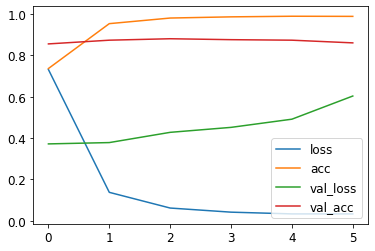

In [ ]:
pd.DataFrame(bidrct_embd_gru_model.history.history).plot()

accuracy_score: 0.881
precision_score: 0.881
recall_score: 0.881
f1_score: 0.881


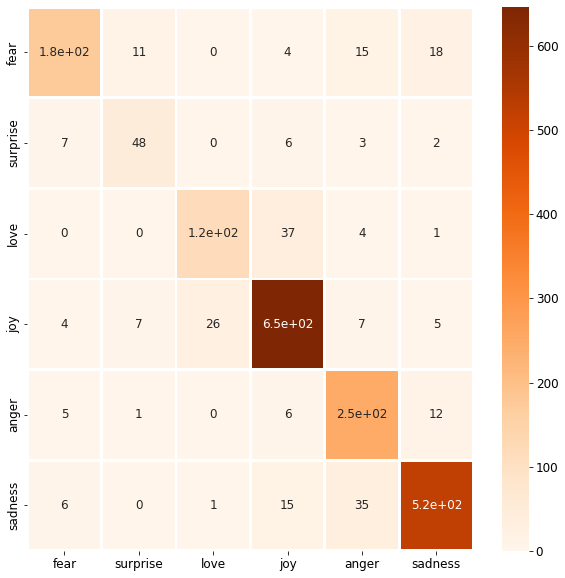

In [ ]:
pred = np.argmax(best_bidrct_embd_gru_model.predict(test_padded), -1)
model_scores(pred, color='Oranges')

### version 2

In [ ]:
tf.keras.backend.clear_session()
bidrct_embd_gru_2_model = tf.keras.Sequential(
    [
     tf.keras.layers.Embedding(input_dim=vocab_size+1, output_dim=embedding_dim, mask_zero=True, input_length=max_sequence),
     tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=128, return_sequences= True)),
     tf.keras.layers.LayerNormalization(),
     tf.keras.layers.Bidirectional(tf.keras.layers.GRU(units=128, return_sequences= False)),
     tf.keras.layers.LayerNormalization(),
     tf.keras.layers.Dense(units=6, activation='softmax')
    ]
)
bidrct_embd_gru_2_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 100)           1000100   
                                                                 
 bidirectional (Bidirectiona  (None, 64, 256)          176640    
 l)                                                              
                                                                 
 layer_normalization (LayerN  (None, 64, 256)          512       
 ormalization)                                                   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              296448    
 nal)                                                            
                                                                 
 layer_normalization_1 (Laye  (None, 256)              512       
 rNormalization)                                        

In [ ]:
best_bidrct_embd_gru_2_model = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/saved_models/BidirEmbdGRU2_Zainab_Mahmood.h5', 
                                                    monitor='val_acc', 
                                                    save_best_only=True )
bidrct_embd_gru_2_model.compile(optimizer=tf.optimizers.Adam(), loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['acc'])
bidrct_embd_gru_2_model.fit(train_dataset, epochs=6, validation_data=test_dataset, callbacks= [best_bidrct_embd_gru_2_model])

Epoch 1/6
250/250 [==============================] - 36s 77ms/step - loss: 0.7054 - acc: 0.7493 - val_loss: 0.2418 - val_acc: 0.9105
Epoch 2/6
250/250 [==============================] - 14s 56ms/step - loss: 0.0954 - acc: 0.9631 - val_loss: 0.2403 - val_acc: 0.9120
Epoch 3/6
250/250 [==============================] - 13s 54ms/step - loss: 0.0448 - acc: 0.9839 - val_loss: 0.3065 - val_acc: 0.9110
Epoch 4/6
250/250 [==============================] - 14s 57ms/step - loss: 0.0314 - acc: 0.9887 - val_loss: 0.2942 - val_acc: 0.9145
Epoch 5/6
250/250 [==============================] - 13s 53ms/step - loss: 0.0222 - acc: 0.9924 - val_loss: 0.3138 - val_acc: 0.9110
Epoch 6/6
250/250 [==============================] - 13s 53ms/step - loss: 0.0165 - acc: 0.9942 - val_loss: 0.3565 - val_acc: 0.9070


In [ ]:
best_bidrct_embd_gru_2_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_models/BidirEmbdGRU2_Zainab_Mahmood.h5')
evaluation_bidrct_embd_gru_2_model = model_details(model= best_bidrct_embd_gru_2_model, model_name= 'BidirGRU2 + Embedded')
evaluation_bidrct_embd_gru_2_model

63/63 [==============================] - 9s 15ms/step - loss: 0.2942 - acc: 0.9145


{'model': 'BidirGRU2 + Embedded', 'val_acc': 0.9145, 'val_loss': 0.2942}

In [ ]:
list_model_details.append(evaluation_bidrct_embd_gru_2_model)
list_model_details

[{'model': 'DNN + Embedded', 'val_acc': 0.8855, 'val_loss': 0.3473},
 {'model': 'RNN1 + Embedded', 'val_acc': 0.858, 'val_loss': 0.4175},
 {'model': 'RNN2 + Embedded', 'val_acc': 0.8665, 'val_loss': 0.4613},
 {'model': 'LSTM1 + Embedded', 'val_acc': 0.88, 'val_loss': 0.372},
 {'model': 'LSTM2 + Embedded', 'val_acc': 0.899, 'val_loss': 0.3546},
 {'model': 'BidirLSTM1 + Embedded', 'val_acc': 0.865, 'val_loss': 0.586},
 {'model': 'BidirLSTM2 + Embedded', 'val_acc': 0.8935, 'val_loss': 0.409},
 {'model': 'GRU1 + Embedded', 'val_acc': 0.8955, 'val_loss': 0.3611},
 {'model': 'GRU2 + Embedded', 'val_acc': 0.914, 'val_loss': 0.2616},
 {'model': 'BidirGRU1 + Embedded', 'val_acc': 0.881, 'val_loss': 0.428},
 {'model': 'BidirGRU2 + Embedded', 'val_acc': 0.9145, 'val_loss': 0.2942}]

#### Plot the model metrics

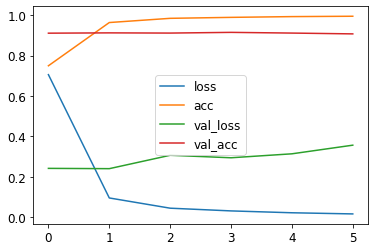

In [ ]:
pd.DataFrame(bidrct_embd_gru_2_model.history.history).plot()

accuracy_score: 0.9145
precision_score: 0.9145
recall_score: 0.9145
f1_score: 0.9145


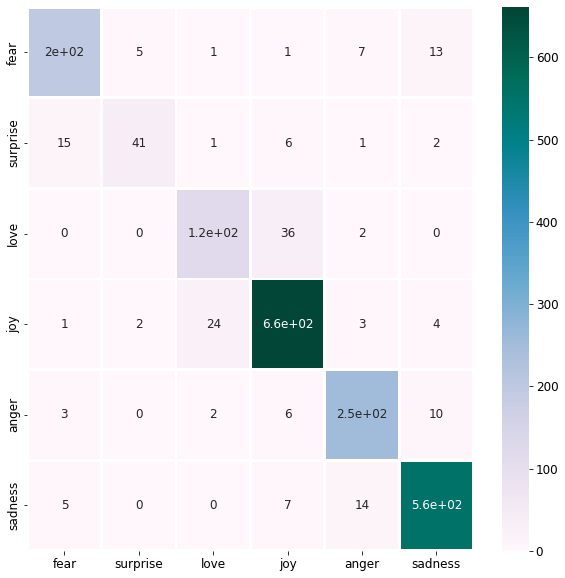

In [ ]:
pred = np.argmax(best_bidrct_embd_gru_2_model.predict(test_padded), -1)
model_scores(pred, color='PuBuGn')

# Best Model

In [ ]:
df = pd.DataFrame(list_model_details)
df

,val_loss,val_acc,model
0,0.3473,0.8855,DNN + Embedded
1,0.4175,0.8580,RNN1 + Embedded
2,0.4613,0.8665,RNN2 + Embedded
3,0.3720,0.8800,LSTM1 + Embedded
4,0.3546,0.8990,LSTM2 + Embedded
5,0.5860,0.8650,BidirLSTM1 + Embedded
6,0.4090,0.8935,BidirLSTM2 + Embedded
7,0.3611,0.8955,GRU1 + Embedded
8,0.2616,0.9140,GRU2 + Embedded
9,0.4280,0.8810,BidirGRU1 + Embedded


In [ ]:
# The model with the least val_loss
df.iloc[df.val_loss.argmin()]

val_loss             0.2616
val_acc               0.914
model       GRU2 + Embedded
Name: 8, dtype: object

In [ ]:
## The model with the highest val_acc
df.iloc[df.val_acc.argmax()]

val_loss                  0.2942
val_acc                   0.9145
model       BidirGRU2 + Embedded
Name: 10, dtype: object

<font size='4' color='pink'>Both 'GRU 2 with Embedded Layer' and 'Bidirectional GRU 2 with Embedded Layer' models have similar performance.
So I will choose the one with the least val_loss as <font color='yellow'>my best model</font> which is <font color='yellow'>'GRU 2 with Embedded Layer'</font>.</font>

In [ ]:
best_model = tf.keras.models.load_model('/content/drive/MyDrive/saved_models/EmbdGRU2_Zainab_Mahmood.h5')
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 64, 100)           1000100   
                                                                 
 gru (GRU)                   (None, 64, 128)           88320     
                                                                 
 layer_normalization (LayerN  (None, 64, 128)          256       
 ormalization)                                                   
                                                                 
 gru_1 (GRU)                 (None, 128)               99072     
                                                                 
 layer_normalization_1 (Laye  (None, 128)              256       
 rNormalization)                                                 
                                                                 
 dense (Dense)               (None, 6)                 7

# Evaluation

In [ ]:
def predict(text):

    tokenized_texts = tokenizer.texts_to_sequences([text])
    input = tf.keras.preprocessing.sequence.pad_sequences(tokenized_texts,
                                                          maxlen=max_sequence,
                                                          padding='post',
                                                          truncating='post')

    print('Predicted Emoji:', index_emoji[np.argmax(best_model.predict(input))])


In [ ]:
#@title Fear Text { run: "auto" }
text_fear = "i remember feeling so frightened that i could feel emotions at that high a level" #@param {type:"string"}
predict(text_fear)

Predicted Emoji: 😨


In [ ]:
#@title Surprise Text { run: "auto" }
text_surprise = "i go through my day feeling your movements and am amazed that something so miraculous is happening in my body its like a special secret only you and i have" #@param {type:"string"}
predict(text_surprise)

Predicted Emoji: 😄


In [ ]:
#@title Love Text { run: "auto" }
text_love = "i feel check the wonder in all that you see you ve got to get loving unconditionally" #@param {type:"string"}
predict(text_love)

Predicted Emoji: 😍


In [ ]:
#@title Joy Text { run: "auto" }
text_joy = "i have some pretty brazen goals and each day i feel stronger and more confident that i m going to reach my desired end result" #@param {type:"string"}
predict(text_joy)

Predicted Emoji: 😄


In [ ]:
#@title Anger Text { run: "auto" }
text_anger = "i actually feel agitated which led to a terrible day yesterday in which i was unable to concentrate on anything and basically piddled the day away\t" #@param {type:"string"}
predict(text_anger)

Predicted Emoji: 😡


In [ ]:
#@title Sadness Text { run: "auto" }
text_sadness = "i woke up feeling crappy tired and fighting this feeling all day maybe it is all the pollen the barometric pressure i dont know i know i was off kilter" #@param {type:"string"}
predict(text_sadness)

Predicted Emoji: 😢


In [ ]:
#@title Random Text { run: "auto" }
text = "I felt like My heart was totally broken." #@param {type:"string"}
predict(text)

Predicted Emoji: 😨


In [ ]:
#@title Random Text { run: "auto" }
text = "I love you, please give me a hug." #@param {type:"string"}
predict(text)

Predicted Emoji: 😍
